# Load the Data

## Link
https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking

I chose this dataset because I enjoy candy and have wondered what makes certain candy more likeable. I looked at the data and it seemed like there wasn't a lot that needed to be done to it clean up wise so that was good. In addition questions that usually don't have a numerical answer were quantified with 0's for nos and 1's for yes, making it easier for me to look at. The data set was also not too big, so I could work on it without struggling. 

In [138]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import hashlib
from sklearn.model_selection import train_test_split

In [139]:
# Load Dataset
dataset = pandas.read_csv("candy-data.csv")

# Goal

This is a dataset that looks at how certain candy can be liked and others disliked. The goal is to estimate whether a candy bar will be more likely or less likely to be chosen depending on which features it carries. For example 66% of a sample population like 100 grand candy bar while Almond Joy is at 50% of the same population. Some features include whether the candy contains chocolate, is it fruit flavored, does the candy contain caramel, etc. 

# Summarize the Dataset

## Dimensions of Datset

In [140]:
# shape
print(dataset.shape)

(85, 13)


In [141]:
# head
dataset.head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


As indicated by the above information:
Dataset Size: Atleast 8.7. KB
85 Entries
13 Columns/Features
Most of the features are in int64 data type with 3 in float64. 

# Data Visualization

In [143]:
corr_matrix = dataset.corr()

In [144]:
corr_matrix['winpercent'].sort_values(ascending=False)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64

Based on this data we can see that the winpercent is relativley closely related to whether or not it has chocolate in it. Another way to visualize it is to plot it.

In [145]:
attributes = ['winpercent', 'chocolate', 'peanutyalmondy', 'bar']

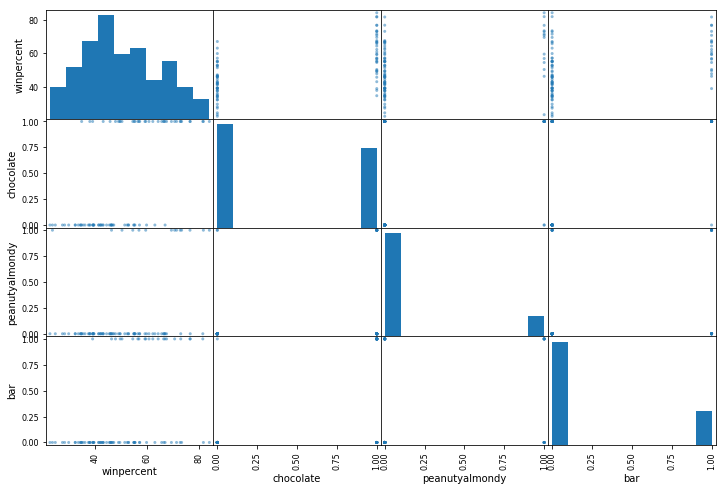

In [146]:
scatter_matrix(dataset[attributes], figsize = (12,8))
plt.show()

From our data the most promising correlation is between winpercent and chocolate. 

# Data Cleaning

In order to use a ML algorithm, I need to omit non numerical data so This means removing the competitorname column. 

In [147]:
dataset.drop('competitorname', axis = 1, inplace = True)

# Select and Train a Model

In [148]:
# Split-out validation dataset

X = dataset[['chocolate','bar', 'peanutyalmondy', 'pricepercent', 'crispedricewafer', 'sugarpercent', 'caramel', 'nougat', 'pluribus', 'hard', 'fruity'] ]
Y = dataset['winpercent']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [149]:
lin_reg = LinearRegression()

In [150]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
data_predictions = ln.predict(X_validation)
print(data_predictions)

[45.69303477 42.13570803 40.1282822  43.60171382 40.63395899 61.12281544
 45.69303477 41.80062244 70.28584614 43.45801166 42.68105632 57.63143451
 43.60171382 40.64086164 40.22063695 66.51688578 35.73901666]


In [152]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(Y_validation, data_predictions)

In [153]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.901319578421734

As can be seen the Linear regression model has a 10.9 difference between estimated values and what is actually there. This is alright but lets see if we can do better with the decision tree

In [154]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [155]:
dataset_predictions = tree_reg.predict(X_validation)
print(dataset_predictions)

[39.185505 23.417824 46.411716 42.178772 46.116505 50.347546 39.185505
 52.825947 66.971725 41.265511 37.722336 43.068897 42.178772 47.173229
 46.411716 56.914547 52.825947]


In [156]:
tree_mse = mean_squared_error(Y_validation, data_predictions)

In [157]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

10.901319578421734

So That's interesting, both of my values are the same. Based on that, I conclude that both the LinearRegression model and DecisionTreeRegressor are decent models but there is clearly room for improvement. Maybe if I check out other models like RandomForest Regressor I might get a smaller rmse value. 

In [158]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_validation, Y_validation, 
                        scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [159]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [11.37385879  7.28114866 25.23756142 25.37679794 15.82428516 14.27066227
  9.71972123 15.907246   10.099197    7.736098  ]
Mean: 14.28265764748347
Standard deviation: 6.219062035862253


In [160]:
lin_scores = cross_val_score(lin_reg, X_validation, Y_validation,
                             scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.92042468e+00 4.85452423e+00 2.42795222e+14 2.12657807e+01
 1.53493587e+01 1.22117807e+01 1.11684062e+01 1.07699633e+01
 2.10024326e+01 1.76260261e+01]
Mean: 24279522232206.14
Standard deviation: 72838566696578.02


Now lets take a look at the RandomForest Regressor to see if it is better than Linear and Tree regressors

In [161]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [162]:
data_predictions = forest_reg.predict(X_validation)
forest_mse = mean_squared_error(Y_validation, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


10.107868895006623

As can be seen the RandomForestRegressor is a little bit worse than the other two models. 

In [163]:
forest_scores = cross_val_score(forest_reg, X_validation, Y_validation, scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 9.46921733  4.83229049 18.85144562 22.33190709  8.52737099 13.38938188
  7.26086539 11.9355089  21.8010458  13.470779  ]
Mean: 13.186981249407822
Standard deviation: 5.7624566534659065


In [165]:
scores = cross_val_score(lin_reg, X_validation, Y_validation, scoring="neg_mean_squared_error", cv = 10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     2.427952e+13
std      7.677859e+13
min      4.854524e+00
25%      1.086957e+01
50%      1.378057e+01
75%      2.015833e+01
max      2.427952e+14
dtype: float64

In [166]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_validation, Y_validation)
data_predictions = svm_reg.predict(X_validation)
svm_mse = mean_squared_error(Y_validation, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

11.018310979697173

In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_validation, Y_validation)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [168]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [169]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [170]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12.987762323911214 {'max_features': 2, 'n_estimators': 3}
11.996343697963193 {'max_features': 2, 'n_estimators': 10}
11.267454281541877 {'max_features': 2, 'n_estimators': 30}
12.066334823521995 {'max_features': 4, 'n_estimators': 3}
11.649167451789067 {'max_features': 4, 'n_estimators': 10}
11.380670436901045 {'max_features': 4, 'n_estimators': 30}
13.859715789344328 {'max_features': 6, 'n_estimators': 3}
12.007168592851999 {'max_features': 6, 'n_estimators': 10}
11.29715819128242 {'max_features': 6, 'n_estimators': 30}
12.683837389225 {'max_features': 8, 'n_estimators': 3}
11.23495026154335 {'max_features': 8, 'n_estimators': 10}
10.964701401141692 {'max_features': 8, 'n_estimators': 30}
12.649745646772503 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
12.650042471058862 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
12.05700638874808 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
11.469164030477753 {'bootstrap': False, 'max_features': 3, 'n_estim

In [171]:
pd.DataFrame(grid_search.cv_results_)

/home/owner/miniconda3/envs/nnseries/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/owner/miniconda3/envs/nnseries/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/owner/miniconda3/envs/nnseries/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004724,0.000844,-168.681970,-76.477072,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",17,-19.325716,...,-130.235501,-90.710314,-73.055369,-107.412952,-388.177552,-87.747086,0.000300,0.000133,131.670028,26.259253
1,0.012911,0.001325,-143.912262,-45.593414,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",10,-15.946010,...,-57.667958,-52.928586,-127.776832,-49.438882,-346.827858,-46.072892,0.001758,0.000215,114.576716,5.680859
2,0.029653,0.001887,-126.955526,-29.645869,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",3,-17.737776,...,-71.866777,-32.269930,-151.792338,-29.607755,-213.002746,-26.531466,0.000999,0.000057,76.326279,6.589420
3,0.003750,0.000572,-145.596436,-75.203407,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",13,-23.067540,...,-190.717225,-129.526761,-80.858751,-71.682249,-192.910771,-70.695253,0.000059,0.000008,86.387229,30.617699
4,0.010328,0.000946,-135.703102,-41.766531,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",7,-34.075922,...,-70.320464,-45.428018,-93.247414,-45.694328,-275.169900,-47.512326,0.000181,0.000048,91.450628,7.941001
5,0.028328,0.001857,-129.519660,-29.330353,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",5,-34.221930,...,-66.228183,-30.582150,-158.455089,-30.621485,-179.168592,-27.938991,0.000244,0.000047,71.273899,6.493375
6,0.003806,0.000586,-192.091722,-71.632238,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",18,-51.411077,...,-190.717225,-108.860664,-117.124917,-71.859345,-231.634418,-78.793000,0.000132,0.000017,112.195437,24.508836
7,0.010821,0.000993,-144.172098,-42.178298,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",11,-30.025507,...,-53.167088,-49.916340,-140.098876,-51.098442,-276.209517,-39.403243,0.000604,0.000044,96.769456,8.395284
8,0.028369,0.001819,-127.625783,-30.114025,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",4,-37.608637,...,-67.133824,-32.061628,-133.902654,-31.977057,-189.006558,-26.513125,0.000250,0.000030,70.070906,6.935517
9,0.003713,0.000567,-160.879731,-71.762275,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",16,-23.076484,...,-150.443125,-105.366804,-92.324612,-94.080787,-211.203501,-63.123102,0.000022,0.000005,108.327905,25.738201


In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_validation, Y_validation)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0a97445518>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0a97445278>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [173]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.151164343138566 {'max_features': 7, 'n_estimators': 180}
11.3080223351143 {'max_features': 5, 'n_estimators': 15}
11.831692047341036 {'max_features': 3, 'n_estimators': 72}
11.218961774079403 {'max_features': 5, 'n_estimators': 21}
11.177195533444383 {'max_features': 7, 'n_estimators': 122}
11.852418211881057 {'max_features': 3, 'n_estimators': 75}
11.722569771336625 {'max_features': 3, 'n_estimators': 88}
11.328062710073551 {'max_features': 5, 'n_estimators': 100}
11.569629347322198 {'max_features': 3, 'n_estimators': 150}
13.926475362090542 {'max_features': 5, 'n_estimators': 2}


# Memo

Dear Manager,

Based on our results we have determined that the idea of looking at what makes certain candy better than others requires some more time, effort, and data. We need more features to improve the accuracy of the training models. We have found that the Linear and Tree regressors are better than the Random forest regressor based on the difference between estimated win percent and actual win percent. I assure you once I recieve more data, the estimations will be more close to what is real and we can hopefully move on to testing new candy with our model. 

# Future

This project has thrown me into the pool of machine learning and data science very deep and although I have learned way more than I could have imagined, my results are not enough to say that I'm done. I need more data, mainly features. The more features I have I think the better my models will run. It means there is more information available to map out and correlate. As of now the chocolate feature is the only feature that strongly correlates to win percent, so maybe take a look at other types of ingrediants that may influence the winpercent. My Linear and Tree Regressor models have high hopes for the future since they yeilded the least error, but the RandomForest Regressor wasn't off by too much either so maybe I can fine tune that at a later time. I am not entirely satisfied with my system. I want at most a 5 points difference between estimated and actual. That means my models need to improve by atleast 50%. 